In [1]:
import numpy as np
import os
import pandas as pd

#Accuracy measurement
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle


#Visualaization
import seaborn as sns
import matplotlib.pyplot as plt


#Model Module
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Activation, Flatten
from tensorflow.keras import backend as bk

from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adamax
from tensorflow.keras.models import Sequential, Model


from tqdm import tqdm
import cv2

In [2]:
# 1. Augmentation
    # 1. Dynamic
    # 2. Static
# 2. Segmentation
# 3. Anotation

In [3]:
# # Overfitting
#     1.  EarlyStoping
#     2. Dropout
#     3. Regularization

In [4]:
classNames = ["cats", 'dogs']
classNameslabels = {classnames: i for i, classnames in enumerate(classNames)}

In [5]:
print(classNameslabels)

{'cats': 0, 'dogs': 1}


In [6]:
print(len(classNameslabels))

2


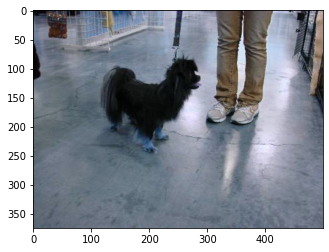

In [7]:
# H/W -- Split the file name and extrat the class names 
imageData = cv2.imread("dataset/training_set/dogs/dog.1000.jpg")
plt.imshow(imageData)
plt.show()

In [8]:
print(imageData.shape)

(375, 499, 3)


In [9]:
image_shape = (150, 150)

In [10]:
def datasetLoaderFromDirectory():
    #Load datasets from folder
    dataset_path = ["dataset/training_set/", "dataset/test_set/"]
    #Store data into the list with their paths
    imageataOutput = []
    # Tag each data path file
    for i in dataset_path:
        #List for image ata
        images = []
        #list for class names
        labels = []
        print("Counting : {}".format(i))

            
        for j in os.listdir(i):
            label = classNameslabels[j]
            for imagedatafile in tqdm(os.listdir(os.path.join(i, j))):
                
                imagePath = os.path.join(os.path.join(i, j), imagedatafile)
                
                #image Read & Preprocessing
                image = cv2.imread(imagePath)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, image_shape)
                
                #print("Images: ", image)
                
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = "float32")
        labels = np.array(labels, dtype = 'float32')
        #print(images)
        imageataOutput.append((images, labels))
    
    return imageataOutput

In [11]:
#datasetLoaderFromDirectory()

In [12]:
#(train_image, train_labesl), (test_image, test_labels) = shuffle(datasetLoaderFromDirectory())

In [13]:
(train_images, train_labels), (test_image, test_labels) = datasetLoaderFromDirectory()

Counting : dataset/training_set/


100%|██████████████████████████████████████| 4000/4000 [00:09<00:00, 423.82it/s]


Counting : dataset/test_set/


100%|██████████████████████████████████████| 1000/1000 [00:02<00:00, 485.53it/s]


In [14]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [15]:
#help(shuffle)

In [16]:
train_labels[5]

0.0

In [17]:
_, trainImageLabelInfo = np.unique(train_labels, return_counts=True)
_, testImageLabelInfo = np.unique(test_labels, return_counts = True)

In [18]:
print("Train Image Label information for 0 Class: ", trainImageLabelInfo[0])
print("Train Image Label information for 1 Class: ", trainImageLabelInfo[1])

print("---------------------------------------------------")

print("Test Image Label information for 0 Class: ", testImageLabelInfo[0])
print("Test Image Label information for 1 Class: ", testImageLabelInfo[1])

Train Image Label information for 0 Class:  4000
Train Image Label information for 1 Class:  4000
---------------------------------------------------
Test Image Label information for 0 Class:  1000
Test Image Label information for 1 Class:  1000


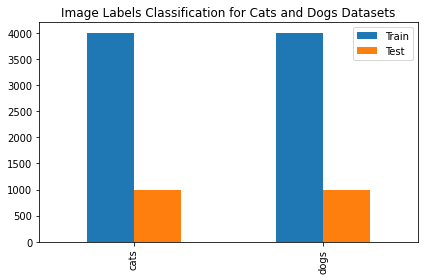

In [19]:
# Creating Dataframe for stroing image labels metadata
# Using Dictionary concept

pd.DataFrame({"Train":trainImageLabelInfo,
            "Test": testImageLabelInfo}, 
             index = classNames
            ).plot.bar()
# plt.plot()
# plt.bar()
plt.title("Image Labels Classification for Cats and Dogs Datasets")
plt.grid(False)
plt.tight_layout()
plt.show()

#### Home Work: Create a Pie chart using above concept

In [20]:
# Read one image features
imageFeature = train_images[0] # Image feature value should be in range between [0, 255]
#np.unique(imageFeature)
len(np.unique(imageFeature))

256

In [21]:
# Scaleing image featues 
train_images = train_images/255.0
test_image = test_image/255.0

In [22]:
#train_images[0]
#np.unique(train_images[0])
len(np.unique(train_images[0]))

256

In [23]:
#train_images.shape[0]
#np.random.randint(train_images.shape[0])
train_images.shape # (8000, 128, 128, 3) --> (Number of Image, Image_W, Image_H, Number of Color channle)

(8000, 150, 150, 3)

In [24]:
#train_labels[345]

In [25]:
# Now Read an image after Scalling
def ImageVisualization(classNames, imagePath, imagelabel):
    #Create an index for indivudual Image
    index = np.random.randint(imagePath.shape[0]) # Index always int
    
    plt.figure()# Define Frame size
    plt.imshow(imagePath[index])
    
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.tight_layout()
    
    plt.title("Index of this Image is: {}".format(index) + " And Class is : "+classNames[int(imagelabel[index])])
    plt.show()

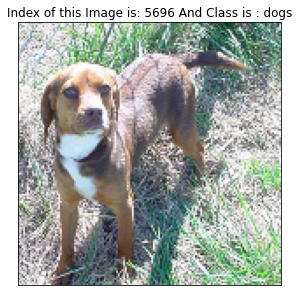

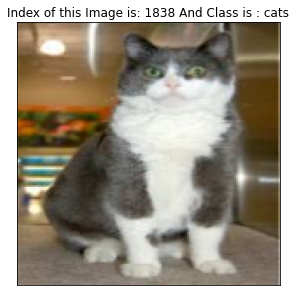

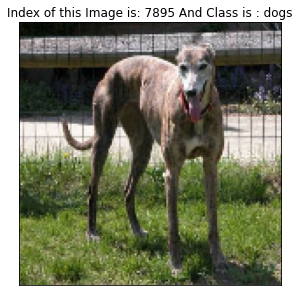

In [26]:
# Home Work: + and Actual is Class Names

for i in range(1, 4):
    ImageVisualization(classNames, train_images, train_labels)

In [27]:
# Home Work: Visualize Image at shape of (3, 3)
# Now Read an image after Scalling
def ImageVisualization2(classNames, imagePath, imagelabel):
    
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle("Random Image Visualization", fontsize = 20 )
    
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.tight_layout()
        
        plt.imshow(imagePath[i], cmap = plt.cm.binary)
        plt.xlabel("Class Names: {}".format(classNames[int(imagelabel[i])]))
    plt.show()

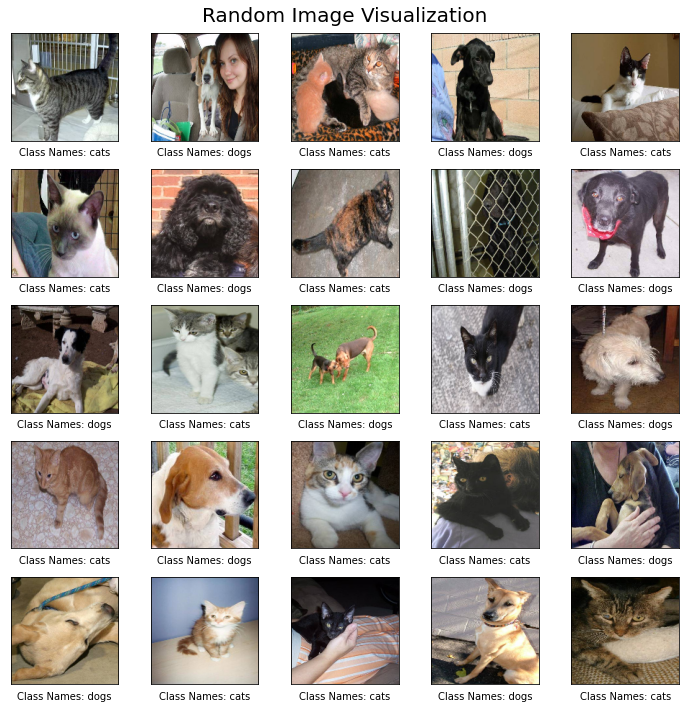

In [28]:
ImageVisualization2(classNames, train_images, train_labels)

In [29]:
train_images.shape

(8000, 150, 150, 3)

In [30]:
model = Sequential([
    
    # Input Layer
    
    Conv2D(32, (3, 3), activation = "relu", input_shape = (150, 150, 3)),
    MaxPooling2D(2, 2),
    
    
    #1st Hidden Layer

    Conv2D(64, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    
     #2nd Hidden Layer
    
    Conv2D(128, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    #3rd Hidden Layer
    
    Conv2D(256, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    
    Flatten(),
    
    # Connected Layer
    
    Dense(256, activation = "relu"),
    Dense(2, activation = "softmax")
])

2022-08-19 19:04:32.460602: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
# model = Sequential()


# #Input Layer
# model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", activation = "relu", input_shape = (224,224, 3)))
# model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

# #(224/2, 224/2) -- > (112, 112)
 #100

# #2nd Layer
# model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 128,kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

# 100 + 40
# #3rd Layer
# model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# #4th Layer
# model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))




# #5th Layer
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# #6th layer
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# model.add(Flatten())


# #Output Layer
# model.add(Dense(256, activation = "relu")) 
# model.add(Dense(128, activation = "relu"))
# model.add(Dense(2, activation = "softmax"))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [33]:
model.compile(optimizer = 'adam',
             loss = "sparse_categorical_crossentropy",
             metrics = ['accuracy'])

In [34]:
modelData = model.fit(train_images,
                     train_labels,
                      epochs = 3,
                     batch_size = 128,
                     validation_split=0.2)

Epoch 1/3
50/50 [==============================] - 105s 2s/step - loss: 0.7049 - accuracy: 0.5088 - val_loss: 0.6901 - val_accuracy: 0.5344
Epoch 2/3
50/50 [==============================] - 86s 2s/step - loss: 0.6672 - accuracy: 0.5856 - val_loss: 0.6326 - val_accuracy: 0.6450
Epoch 3/3
50/50 [==============================] - 87s 2s/step - loss: 0.6126 - accuracy: 0.6616 - val_loss: 0.5804 - val_accuracy: 0.6925


In [35]:
def accuracy_and_loss_Plot(modelData):
    
    fig = plt.figure(figsize = (10, 10))
    
    plt.subplot(221)
    plt.plot(modelData.history["accuracy"], 'bo--', label = 'accuracy')
    plt.plot(modelData.history["val_accuracy"], 'ro--', label = 'val_accuracy')
    plt.title("Training Data Accuracy Measurement")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Accuracy Information")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    
    
    plt.subplot(222)
    plt.plot(modelData.history["loss"], 'bo--', label = 'loss')
    plt.plot(modelData.history["val_loss"], 'ro--', label = 'val_loss')
    plt.title("Training Data Loss Measurement")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss Information")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.show()

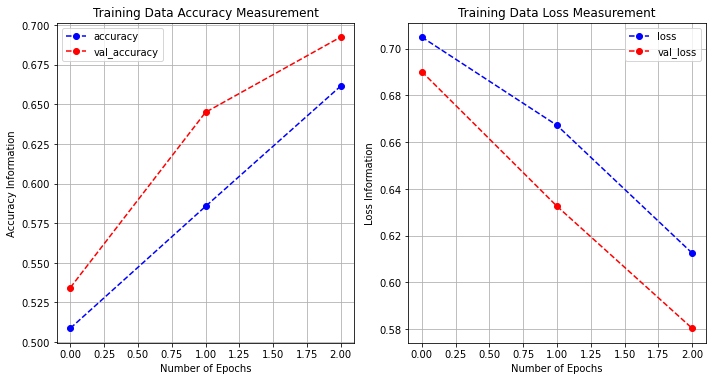

In [36]:
accuracy_and_loss_Plot(modelData)

In [37]:
testLoss = model.evaluate(test_image, test_labels)

63/63 [==============================] - 9s 145ms/step - loss: 0.5810 - accuracy: 0.6955


63/63 [==============================] - 9s 138ms/step


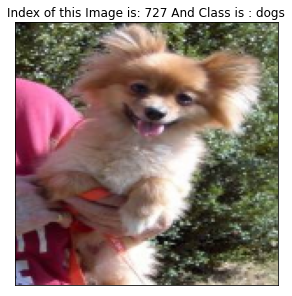

In [38]:
predictedData = model.predict(test_image)
predictedDataLabels = np.argmax(predictedData, axis = 1)
ImageVisualization(classNames, test_image, predictedDataLabels)

In [39]:
# # Home Work: + and Actual is Class Names
# for i in range(1, 10):
#     ImageVisualization(classNames, test_image, predictedDataLabels)

In [40]:
# def missClassification(classNames, ImageData, ImageLabels, predictedDataLabels):
    
#     result = (ImageLabels == predictedDataLabels)
#     #print(result)
#     missClass = np.where(result == 0)
#     #print(int(missClass))
    
#     missClassImage = imageData[missClass]
#     missClasslabels = predictedDataLabels[missClass]
    
#     print("Miss Classification Image Data is: ")
#     ImageVisualization2(classNames, missClassImage, missClasslabels)

In [41]:
def missClassification(class_names, test_images, test_labels, pred_labels):
    result = (test_labels == pred_labels)
    missClass = np.where(result == 0)
    missClassImage = test_images[missClass]
    missClasslabels = pred_labels[missClass]

    title = "Some examples of mislabeled images by the classifier:"
    ImageVisualization2(class_names,  missClassImage, missClasslabels)

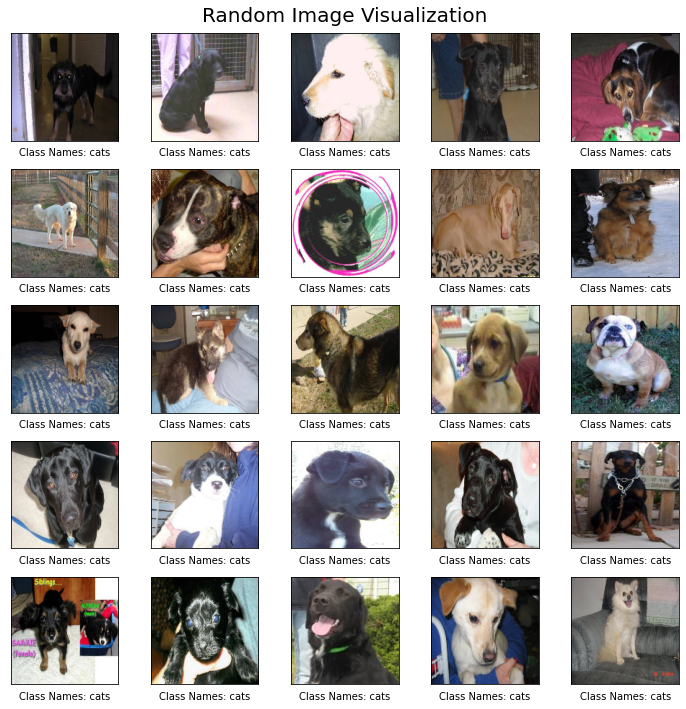

In [42]:
missClassification(classNames, test_image, test_labels, predictedDataLabels)

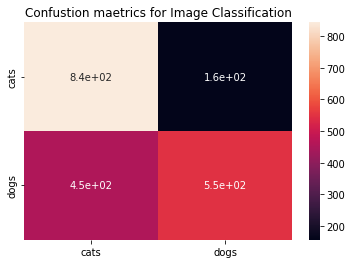

In [43]:
Cm = confusion_matrix(test_labels, predictedDataLabels)
ax = plt.axes()
sns.heatmap(Cm, annot=True, 
           annot_kws={'size':10}, 
           xticklabels=classNames,
           yticklabels=classNames, 
           ax = ax)

plt.title("Confustion maetrics for Image Classification")
plt.show()

In [44]:
# 1. TP
# 2. TN
# 3. FP
# 4. FN


# 1. Accuracy = (TP + TN) / (TP + TN + FP + FN)
# 2. MissClassification  = (FP + FN) / (TP + TN + FP + FN)

<h3><center> VGG Implementation </center></h3>

<h4><center> Home work </center></h4>
1. Filters Starts from 32

2. padding = "valid"
3. input_shape = (128, 128, 3)
4. MaxPooling2D = (3, 3)
5. Strides = 4
6. in 5th & 6th Layer total Conv2D = 4
7. Kernel size = 11, 11

In [45]:
# model = Sequential()


# #Input Layer
# model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", activation = "relu", input_shape = (224,224, 3)))
# model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

# #(224/2, 224/2) -- > (112, 112)
 #100

# #2nd Layer
# model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 128,kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

# 100 + 40
# #3rd Layer
# model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# #4th Layer
# model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))




# #5th Layer
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# #6th layer
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
# model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# model.add(Flatten())


# #Output Layer
# model.add(Dense(256, activation = "relu")) 
# model.add(Dense(128, activation = "relu"))
# model.add(Dense(2, activation = "softmax"))

In [46]:
#model.summary()

In [47]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=model.inputs, outputs=model.layers[-5].output)

In [48]:
train_features = model.predict(train_images)
test_features = model.predict(test_image)

63/63 [==============================] - 103s 2s/step


In [49]:
from keras.layers import Input, Dense, Conv2D, Activation , MaxPooling2D, Flatten

model2 = VGG16(weights='imagenet', include_top=False)

input_shape = model2.layers[-4].get_input_shape_at(0) # get the input shape of desired layer
layer_input = Input(shape = (9, 9, 512)) # a new input tensor to be able to feed the desired layer
# https://stackoverflow.com/questions/52800025/keras-give-input-to-intermediate-layer-and-get-final-output

x = layer_input
for layer in model2.layers[-4::1]:
    x = layer(x)
    
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(100,activation='relu')(x)
x = Dense(6,activation='softmax')(x)

# create the model
new_model = Model(layer_input, x)

In [50]:
new_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [51]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 9, 9, 512)]       0         
                                                                 
 block5_conv1 (Conv2D)       multiple                  2359808   
                                                                 
 block5_conv2 (Conv2D)       multiple                  2359808   
                                                                 
 block5_conv3 (Conv2D)       multiple                  2359808   
                                                                 
 block5_pool (MaxPooling2D)  multiple                  0         
                                                                 
 conv2d_4 (Conv2D)           (None, 2, 2, 64)          294976    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 1, 1, 64)         0   

In [52]:
history = new_model.fit(train_features, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
50/50 [==============================] - 103s 2s/step - loss: 1.7834 - accuracy: 0.5944 - val_loss: 0.4300 - val_accuracy: 0.7931
Epoch 2/10
50/50 [==============================] - 100s 2s/step - loss: 0.2573 - accuracy: 0.8919 - val_loss: 0.2024 - val_accuracy: 0.9256
Epoch 3/10
50/50 [==============================] - 103s 2s/step - loss: 0.1838 - accuracy: 0.9280 - val_loss: 0.1924 - val_accuracy: 0.9281
Epoch 4/10
50/50 [==============================] - 101s 2s/step - loss: 0.1535 - accuracy: 0.9388 - val_loss: 0.1731 - val_accuracy: 0.9325
Epoch 5/10
50/50 [==============================] - 111s 2s/step - loss: 0.1174 - accuracy: 0.9547 - val_loss: 0.2242 - val_accuracy: 0.9125
Epoch 6/10
50/50 [==============================] - 106s 2s/step - loss: 0.0957 - accuracy: 0.9622 - val_loss: 0.1704 - val_accuracy: 0.9406
Epoch 7/10
50/50 [==============================] - 105s 2s/step - loss: 0.0757 - accuracy: 0.9708 - val_loss: 0.1984 - val_accuracy: 0.9375
Epoch 8/10
50

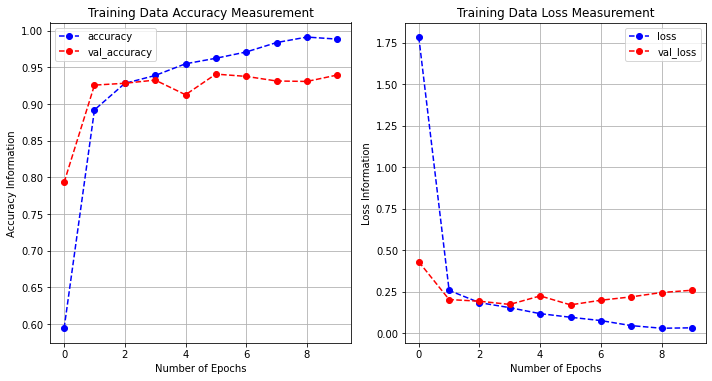

In [53]:
accuracy_and_loss_Plot(history)

In [54]:
from sklearn.metrics import accuracy_score

predictions = new_model.predict(test_features)    
pred_labels = np.argmax(predictions, axis = 1)
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

63/63 [==============================] - 9s 140ms/step
Accuracy : 0.9275
